# LitPop class

The modeling of economic disaster risk on a global scale requires high-resolution maps of exposed asset values. We have developed a generic and scalable method to downscale national asset value estimates proportional to a combination of nightlight intensity ("Lit") and population data ("Pop"). 

Asset exposure value is distributed to the grid proportzonal to $Lit^m Pop^n$, computed at each grid cell:


$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).


For more information please refer to the related publication (https://doi.org/10.5194/essd-12-817-2020) and data archive (https://doi.org/10.3929/ethz-b-000331316).

How to cite:

Eberenz, S., Stocker, D., Röösli, T., and Bresch, D. N.: Asset exposure data for global physical risk assessment, Earth Syst. Sci. Data, 12, 817–833, https://doi.org/10.5194/essd-12-817-2020, 2020.


## Input data:

All required data except for the population data (GPW) is acquired automatically when LitPop is initiated.

*Nithlights*: Black Marble 2016 annual composite of the VIIRS day-night band (DNB) at 15 arcsec resolution is downloaded from the NASA Earth Observatory: https://earthobservatory.nasa.gov/Features/NightLights (available for 2012 and 2016 at 15 arcsec resolution (~500m))

*Population*: Gridded Population of the World (GPW), v4: Population Count, v4.10, v4.11 or later versions (2000, 2005, 2010, 2015, 2020), available from http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse.

The GPW file of the year closest to the target year is required.
To download GPW data you need to register on the SEDAC website (for free).
Then you can access the download site, i.e.: http://sedac.ciesin.columbia.edu/data/set/gpw-v4-population-count-rev11/data-download.
There, choose the settings as shown, ticking the box of the years you need:
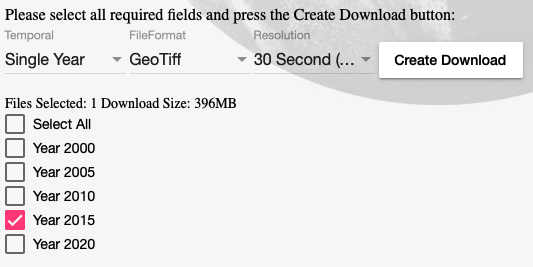
The population data from GWP needs to be downloaded manually as TIFF from this site and placed in the system data folder of climada, i.e.: climada_python/data/system/gpw_v4_population_count_rev11_2015_30_sec.tif.

Direct download links are avilable, also for older versions, i.e.:
- v4.11: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev11/gpw-v4-population-count-rev11_2015_30_sec_tif.zip
- v4.10: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev10/gpw-v4-population-count-rev10_2015_30_sec_tif.zip, 
- Overview over all versions of GPW v.4: https://beta.sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse

*Macroeconomic indicator*: Available macroeconomic indicators can be selected via the variable fin_mode:
- 'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014 USD, data is available for the years 1995, 2000, 2005, 2010, 2014). The pc-data is stored in the subfolder *data/system/Wealth-Accounts_CSV/*. Source: https://datacatalog.worldbank.org/dataset/wealth-accounting
- 'gdp': gross-domestic product (Source: World Bank)
- 'income_group': gdp multiplied by country's income group+1
- 'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
- 'tw': households' total wealth (Source: Credit Suisse, of households only)

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

## Downloading existing LitPop asset exposure data

Readily computed LitPop asset exposure data based on $Lit^1Pop^1$ for 224 countries, distributing produced capital / non-financial wealth of 2014 at a resolution of 30 arcsec can be downloaded from the ETH Research Repository: https://doi.org/10.3929/ethz-b-000331316.
The dataset contains gridded data for more than 200 countries as CSV files. [These can be imported into Python using the Exposures class, i.e. *Exposures(pd.read_csv(file_name))*]


Please refer to and quote the related publication if you are using LitPop exposure data in your studies:
https://doi.org/10.5194/essd-2019-189.


## Initiating LitPop()

The `LitPop` class inherits from the [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class) class. It provides a `set_country()` method which enables to compute exposure data for a country using different settings and input data. The first time a nightlight image is used, it is downloaded and stored locally. This might take some time.



In [ ]:
# Import required packages:
import numpy as np
import pandas as pd
from matplotlib import colors
from iso3166 import countries as iso_cntry

from climada.entity import LitPop


## Country Exposure
In the following, we will create exposure data sets and plots for a variety of countries, comparing different settings.
### Default Settings

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):
ent = LitPop()
ent.set_country('HTI')


""" In case you encounter an error here, because the GPW data is missing: The gridded population count data used are the following:
- Gridded Population of the World (GPW), v4: Population Count, v4.10 or later (2000, 2005, 2010, 2015, 2020).
http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse
The population data from GWP needs to be downloaded manually as TIFF
from this site and placed in the system data folder of climada,
i.e.: climada_python/data/system/gpw_v4_population_count_rev10_2015_30_sec.tif
"""

### Plotting
The exposure entity was initiated using the default setting, i.e. a resolution of 30 arcsec and produced capital 'pc' as total asset value, using the exponents $[1, 1]$.

If the init worked, we can now plot a map of Haiti's exposure.
We can get a good impression of the exposure distribution in Haiti by comparing plots with linear and log-normal colormaps:

(please refer to the exposure tutorial *climada_entity_Exposures.ipynb* for more info on the visualization of exposure data.)

In [ ]:
ent = LitPop()
ent.set_geometry_points()
# plot exposure with linear colormap and major towns (pop_name=True):
ent.plot_hexbin(pop_name=True)
# plot exposure with log-normal colormap:
norm=colors.LogNorm(vmin=500, vmax=4.0e9)
ent.plot_hexbin(norm=norm)

### Settings: fin_mode
Instead on produced capital, we can also downscale other available macroeconomic indicators as estimates of asset value.
The indicator can be set via the variable fin_mode:

    'pc': produced capital (Source: World Bank DataBank), incl. manufactured or built assets such as machinery, equipment, and physical structures (pc is in constant 2014-USD, data available for the years 1995, 2000, 2005, 2010, 2014)
    'gdp': gross-domestic product (Source: World Bank)
    'income_group': gdp multiplied by country's income group+1
    'nfw': households' non-financial wealth (Source: Credit Suisse, of households only)
    'tw': households' total wealth (Source: Credit Suisse, of households only)
    
Let's initiate the entity for Haiti with the financial mode "income_group":

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):

ent = LitPop()
ent.set_country('HTI', fin_mode='income_group') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):

ent = LitPop()
ent.set_country('HTI', fin_mode='gpd') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):

ent = LitPop()
ent.set_country('HTI', fin_mode='nfw') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):

ent = LitPop()
ent.set_country('HTI', fin_mode='pc') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

In [ ]:
# Initiate a default LitPop exposure entity for Haiti (ISO3-Code 'HTI'):

ent = LitPop()
ent.set_country('HTI', fin_mode='tw') # try other fin_modes: 'gdp', 'nfw', 'pc'
# plot exposure:
ent.plot_hexbin(pop_name=True)

This map shows like the default one above, the only difference is the absolute value per pixel: Note that the range of the color scale has changed because the total asset value estimated with the income_group mode is larger than produced capital stock.

### Settings: resolution (res_arcsec) and reference_year

We can also change the resolution in arc seconds to one of these values: 30, 60, 120, 300, 600, 3600.

$30 arcsec \approx 1 km$.

$3600 arcsec = 1\degree \approx 110 km$.

Additionally, we can change the year our exposure is supposed to represent. For this, nightlight and population data  are used that are closest to the requested years. Macroeconomic indicators like produced capital are interpolated from available data or scaled proportional to GDP.

Let's estimate a produced capital exposure map for Switzerland in 2017 with a resolution of 300 arcsec:

In [ ]:
ent = LitPop()
ent.set_country('HTI', fin_mode='pc', res_arcsec=300, reference_year=2020)
ent.set_geometry_points()
# plot exposure with larger line width for better visibility:
ent.plot_hexbin(linewidth=7)
# Instead of linewight, the gridsize can be adjusted for better visibility (low values --> big markers).
# Warning: If gridsize is changed, the plot doesn't reflect the actual data's grid anymore,
# (please refer to the exposure tutorial *climada_entity_Exposures.ipynb* 
# for more info on the visualization of exposure data.)
ent.plot_hexbin(gridsize=20)

As can you can read from the logger output above the plot, the following data time steps were used to estimate 2017's exposure:
- GPW Population of 2015 (closest year)
- BlackMarble Nightlights of 2016 (closest year)
- Produced capital of 2014 (closest year), inflated proportional to the GDP increase from 2014 to 2017. This is an inflation of roughly 4.5% in this case.


### Settings: exponents of $Lit^mPop^n$

LitPop per pixel is the product of the exponents of nightlights+1 (Lit) and Population count (Pop).

$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \N_0$ (Default values are $m=n=1$).

We can also change m and n.

**For countries with badly resolved population data (i.e. Jamaica or Uzbekistan), it can make sense to use nightlights only, i.e. an high exponent of Lit instead of LitPop.** 
Note that if Pop is not used, $Lit = nightlights$ instead of $nightlights+1$.

Let's compare exposure maps for $LitPop=Lit^1Pop^1$ (default); $Lit^4$; and $Pop^1$ Jamaica at a resolution of 60 arcsec.

Please execute one cell after the other:


In [ ]:
ent = LitPop()
res = 30
country = 'HTI' # Try different countries, i.e. 'JAM', 'CHE', 'RWA', 'MEX'
markersize = 3
gridsize = 70
buffer_deg=.04
# The arguments 'exponent' is used to set the power with which Lit and Pop go into LitPop:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[0, 1])  # Population only
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
# note: buffer_deg adds a buffer around the plotted data to show the whole country
"""Lit^0 * Pop^1"""

In [ ]:
# Haiti continued:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[1, 1]) # Nightlights^4 only
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 Pop^1"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[1, 2]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 * Pop^2"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[1, 3]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 * Pop^3"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[2, 1]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^2 * Pop^1"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[3, 1]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^3 * Pop^1"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[1, 0]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^1 * Pop^0"""

In [ ]:
ent.set_country(country, res_arcsec=res, reference_year=2020, exponents=[0, 2]) # Default LitPop [1, 1]
ent.set_geometry_points()
ent.plot_hexbin(gridsize = gridsize, linewidth=markersize, buffer=buffer_deg)
"""Lit^0 * Pop^2"""

## Export Exposure Data to CSV <a class="anchor" id="export"></a>

The method ent.to_csv() can be used to export any CLIMADA exposure entity to a CSV-file.

Please refer to the exposure tutorial *climada_entity_Exposures.ipynb* for more info on the export of exposure data!


In [ ]:
# Export LitPop based entity to CSV:
# set output path:
import os
from climada.util.constants import DATA_DIR # default CLIMADA-data directory
output_path = os.path.join(DATA_DIR, 'export') # subfolder export
if not os.path.isdir(output_path): # create output folder if it does not exist
    os.mkdir(output_path)
# set output file path:
output_path = os.path.join(output_path, 'LitPop_HTI.csv')
# Export data:
ent.to_csv(output_path, sep=',')

# display('Exposure entity exported to' + output_path)

# Note that the variable "region_id" in the exported CSV file is a number identifying the country, i.e.:
display('Examples for region_id:')
display('Burundi: ' + str(iso_cntry.get('BDI').numeric))
display('Tanzania: ' + str(iso_cntry.get('TZA').numeric))
display('Rwanda: ' + str(iso_cntry.get('RWA').numeric))


## Map exposure points to Admin1-Regions <a class="anchor" id="admin1_att"></a>

The method litpop.exposure_set_admin1() can be used to map the data points in any gridded CLIMADA exposure entity to 
admin1-regions, i.e. cantons, states, districts, etc.

Warning: the resolution handed over as a parameter needs to match the resolution of the exposure grid in arc seconds.



In [ ]:
from climada.entity.exposures import litpop as lp
from climada.entity import Exposures
# Map LitPop exposure to districts for Bangladesh:
country_name = ['HTI']
resolution = 600
ent = lp.LitPop()
ent.set_country(country_name, res_arcsec=resolution)
ent = lp.exposure_set_admin1(ent, resolution)
# Print first 10 entries:
print(ent.iloc[0:10])
# Select district of Rangpur only and plot exposure:
#ent_rangpur = Exposures(ent[ent.admin1 == 'Rangpur'])
#ent_rangpur.check()
#ent_rangpur.plot_raster()
